# Neural Network Modeling

### Import Libraries and Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, mean_squared_error, median_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix, balanced_accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, plot_roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('./data/school_df_v6.csv')

In [14]:
df = df.iloc[:,:45]
df.dropna(how='all', inplace=True)

In [15]:
# drop 2 schools that have no attendance data
df.drop(df[df['code'] == 201].index, inplace = True)
df.drop(df[df['code'] == 347].index, inplace = True)
df = df.replace(-1,np.nan)
df.dropna(how='any',inplace=True)

In [16]:
df = df.replace(-1,np.nan)
df.dropna(how='any',inplace=True)
df = df[df['star_rating_SY1819'] !=-1]

In [34]:
X=df[['enrollment_SY1718', 'enrollment_SY1819', 'capacity_SY1718', 
        'capacity_SY1819', 'latitude', 'longitude', 'cluster', 'ward','pct_0_SY1819', 
        'pct_1-5_SY1819', 'pct_6-10_SY1819', 'pct_11-20_SY1819', 'pct_20+_SY1819', 
        'pct_0_SY1718', 'pct_1-5_SY1718', 'pct_6-10__SY1718', 'pct_11-20_SY1718', 
        'pct_20+_SY1718', 'budgeted_amount_FY16', 'budgeted_enrollment_FY16', 
        'budgeted_amount_FY17', 'budgeted_enrollment_FY17', 'pct_meet_exceed_math_SY1718', 
        'pct_meet_exceed_ela_SY1718', 'pct_meet_exceed_math_SY1819', 'pct_meet_exceed_ela_SY1819']]
y = df['star_rating_SY1819']
y = y-1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [35]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.fit_transform(X_test)

In [36]:
y.value_counts()

3.0    28
1.0    22
2.0    15
4.0    10
0.0     6
Name: star_rating_SY1819, dtype: int64

### Build the model

In [37]:
y.value_counts()

3.0    28
1.0    22
2.0    15
4.0    10
0.0     6
Name: star_rating_SY1819, dtype: int64

In [39]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [40]:
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['mse', 'accuracy'])

In [41]:
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=300,
                    verbose=0)
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 229ms/step - loss: 1179707.5000 - mse: 4.7048 - accuracy: 0.3333


[1179707.5, 4.704761981964111, 0.3333333432674408]

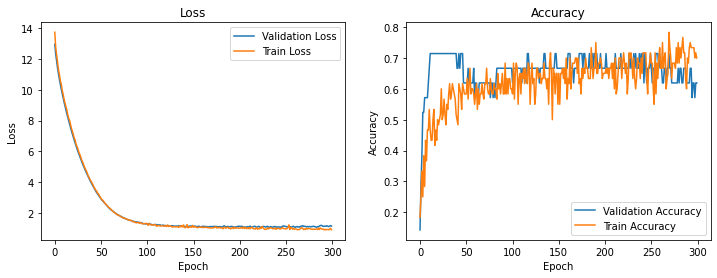

In [44]:
fig = plt.figure(figsize = (12, 4))

ax= fig.add_subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

ax= fig.add_subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy',)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

In [11]:
# # Model Predictions
# y_test_scaled = to_categorical(y_test_scaled, 6)
# y_pred = model.predict(X_test_scaled)
# fig, ax = plt.subplots(figsize=(4, 4))
# plt.scatter(y_test_scaled, y_pred)
# ax.plot([0,1], [0,1], transform=ax.transAxes, ls="--", c="orange")
# plt.title('Neural Network Model')
# plt.xlabel('School Star Rating')
# plt.ylabel('Model Predictions');